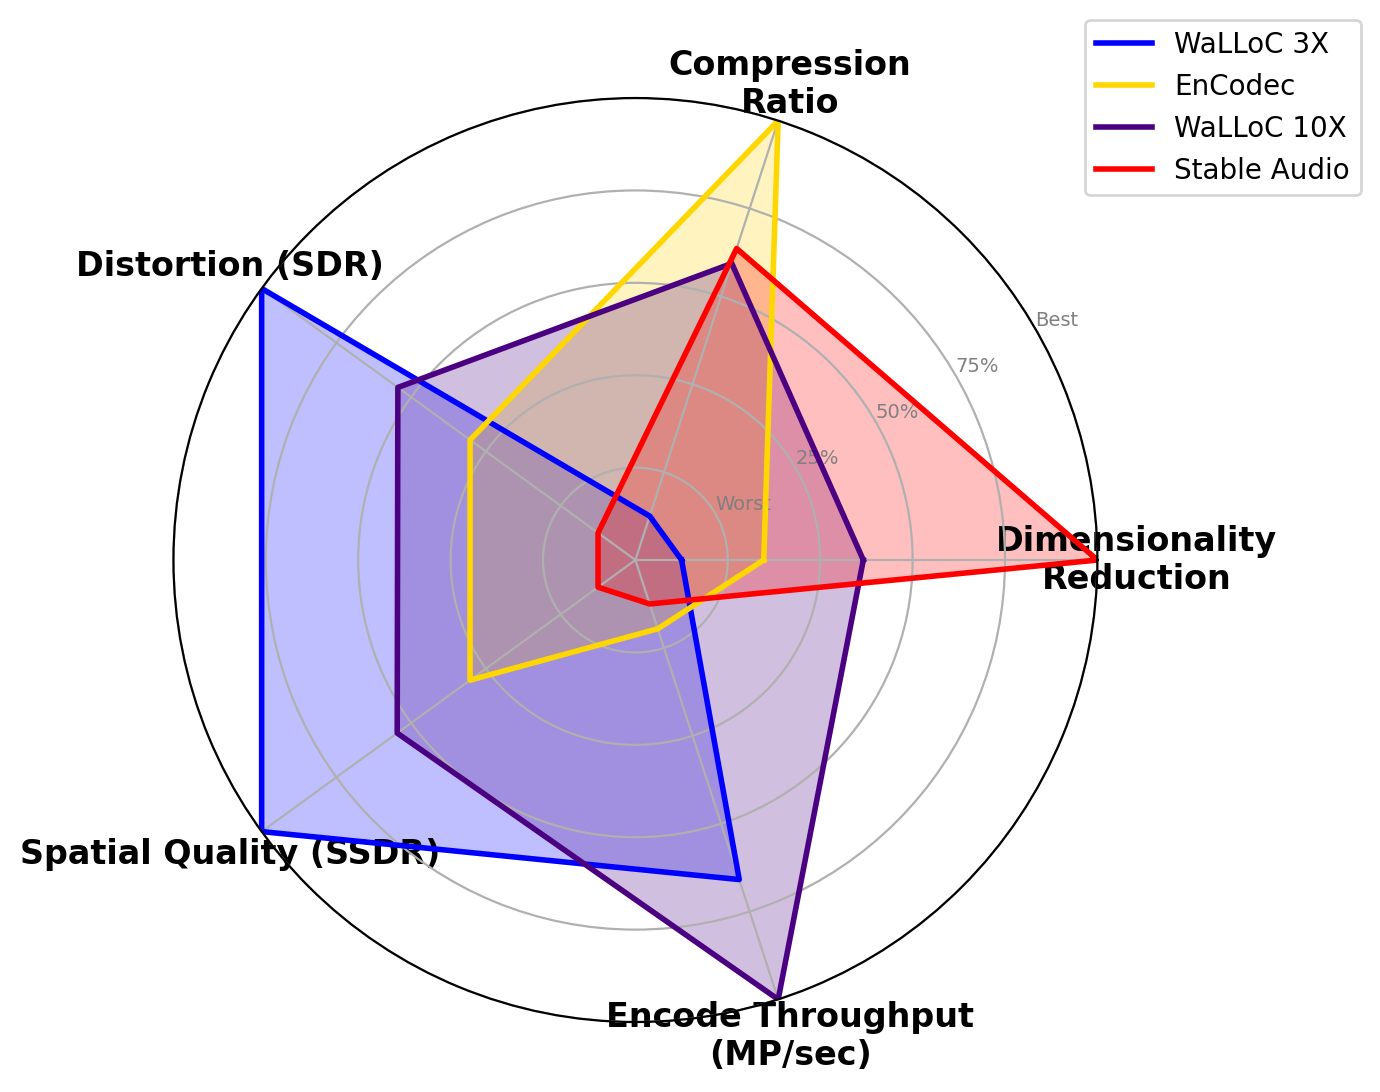

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
data = {
    'Name': ['WaLLoC 3X', 'EnCodec', 'WaLLoC 10X', 'Stable Audio'],
    'DR': np.log10([2.67, 5.00, 10.7, 64.0]),
    'CR': np.log10([18.0, 116, 59.2, 63.5]),
    'Enc': [29.3, 2.94, 41.9, 0.328],
    'Dec': [6.91, 3.13, 7.54, 0.312],
    'PSNR': [45.1, 40.7, 33.1, 37.9],
    'SSDR': [32.9, 24.6, 27.5, 19.5],
    'SRDR': [12.7, 7.27, 7.41, 3.52],
    'CDPAM': [47.0, 48.9, 43.2, 51.9]
}

df = pd.DataFrame(data)

# Calculate Total SDR using the provided formula
df['Total_SDR'] = 10 * np.log10(10 ** (df['SSDR'] / 10) + 10 ** (df['SRDR'] / 10)) - 10 * np.log10(2)

# Metrics to include
metrics = ['DR', 'CR', 'Total_SDR', 'SSDR', 'Enc',]

# Normalize data
normalized_data = {}
for metric in metrics:
    min_val = df[metric].min()
    max_val = df[metric].max()
    # Normalize between 0.1 and 1 to give minimum a non-zero radius
    norm = (df[metric] - min_val) / (max_val - min_val)
    norm = norm * 0.9 + 0.1  # Scale to range [0.1, 1]
    normalized_data[metric] = norm

# Create DataFrame of normalized data
norm_df = pd.DataFrame(normalized_data)
norm_df['Name'] = df['Name']

# Number of variables we're plotting
num_vars = len(metrics)

# Compute angle of each axis in the plot (divide plot / number of variables)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
# Complete the loop
angles += angles[:1]

# Metric labels
metric_labels = [
    'Dimensionality\nReduction',
    'Compression\nRatio',
    'Distortion (SDR)',
    'Spatial Quality (SSDR)',
    'Encode Throughput\n(MP/sec)',
]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True), dpi=200)

# Draw one axis per variable + add labels
plt.xticks(angles[:-1], metric_labels, fontsize=12, fontweight='bold')

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks(
    [0.2, 0.4, 0.6, 0.8, 1.0],
    ["Worst", "25%", "50%", "75%", "Best"],
    color="grey",
    size=7
)
plt.ylim(0, 1)

# Define colors for each codec
colors = {
    'WaLLoC 3X': 'blue',
    'WaLLoC 10X': 'indigo',
    'EnCodec': 'gold',
    'Stable Audio': 'red',
}

# Plot data
for i, row in norm_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Repeat first value to close the loop
    ax.plot(
        angles,
        values,
        color=colors[row['Name']],
        linewidth=2,
        linestyle='solid',
        label=row['Name']
    )
    ax.fill(
        angles,
        values,
        color=colors[row['Name']],
        alpha=0.25
    )

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the plot
plt.show()
fig.savefig("radar_audio.svg")
